# ΣΥΣΤΗΜΑΤΑ ΛΗΨΗΣ ΑΠΟΦΕΑΣΕΩΝ
## Εκφωνηση 2
### Ανδρεας Μαυροπουλος 217129

In [1]:
# General Imports
import numpy as np 
import pandas as pd 



# Modles from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,r2_score,mean_absolute_error,mean_squared_error



# IMPORTS FOR EDA
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.interpolate import UnivariateSpline

# REMOVE WARNING MESSAGES
import warnings
warnings.filterwarnings('ignore')

# Task 1
Import and Fix Dataaset

In [2]:
heart_disease = pd.read_csv("/content/drive/MyDrive/Kaggle/Personal Key Indicators of Heart Disease/heart_2020_cleaned.csv")
heart_disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
heart_disease['AgeCategory'] = heart_disease['AgeCategory'].replace({'55-59':57, '80 or older':80, '65-69':67,
                                                                    '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                                                                    '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                                                                    '30-34':32,'25-29':27})

In [4]:
heart_disease.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Fix Dataset by:


1.   Turing yes or no categories to 0 and 1
2.   Making the sex 0 for females and 1 for males
3.   Turning Race into a list of numbers where
          
          > 0 = White
          > 1 = Black
          > 2 = Asian
          > 3 = American
          > 4 = Indian/Alaskan Native
          > 5 = Other
          > 6 = Hispanic


4. Turning GenHealth into a list of numbers where
          > 0 = Very good
          > 1 = Fair
          > 2 = Good
          > 3 = Poor
          > 4 = Excellent

5. Turn AgeCategory into a list of numbers where we take the median age in order to get better values
          > 21  = 18-24
          > 27 = 25-29
          > 32  = 30-34
          > 37  = 35-39
          > 42  = 40-44
          > 47  = 45-49
          > 52  = 50-54
          > 57  = 55-59
          > 62  = 60-64
          > 67  = 65-69
          > 72 = 70-74
          > 77 = 75-79
          > 80 = 80 or older

        





## Task 2 Exploratory EDA
will fix dataset as said above after EDA so we can have a better look at it

In [6]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity','GenHealth',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(heart_disease['HeartDisease'].value_counts().index),
                     values=[x for x in heart_disease['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(heart_disease['Smoking'].value_counts().index),
                     values=[x for x in heart_disease['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(heart_disease['AlcoholDrinking'].value_counts().index),
                     values=[x for x in heart_disease['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(heart_disease['Stroke'].value_counts().index),
                     values=[x for x in heart_disease['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(heart_disease['DiffWalking'].value_counts().index),
                     values=[x for x in heart_disease['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(heart_disease['Sex'].value_counts().index),
                     values=[x for x in heart_disease['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(heart_disease['Race'].value_counts().index),
                     values=[x for x in heart_disease['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(heart_disease['PhysicalActivity'].value_counts().index),
                     values=[x for x in heart_disease['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(heart_disease['Diabetic'].value_counts().index),
                     values=[x for x in heart_disease['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(heart_disease['GenHealth'].value_counts().index),
                     values=[x for x in heart_disease['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(heart_disease['Asthma'].value_counts().index),
                     values=[x for x in heart_disease['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(heart_disease['KidneyDisease'].value_counts().index),
                     values=[x for x in heart_disease['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(heart_disease['SkinCancer'].value_counts().index),
                     values=[x for x in heart_disease['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

In [7]:
heart_disease.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,54.355759,17.720429,21.000000,42.000000,57.000000,67.000000,80.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


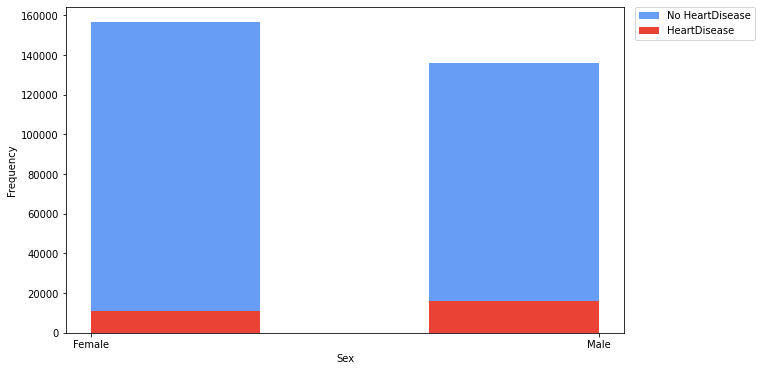

In [8]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

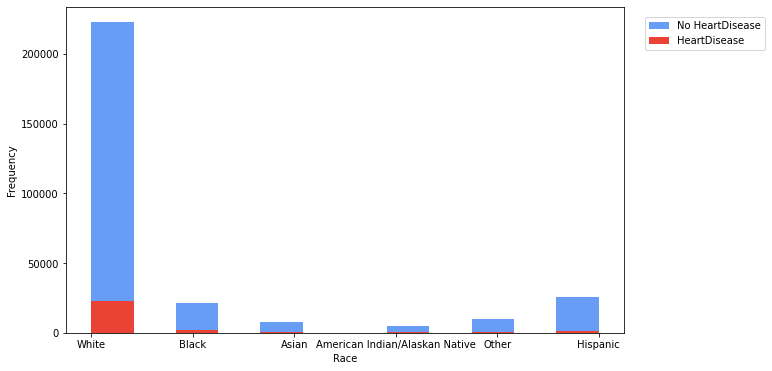

In [9]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["Race"], bins=12, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["Race"], bins=12, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=1.);

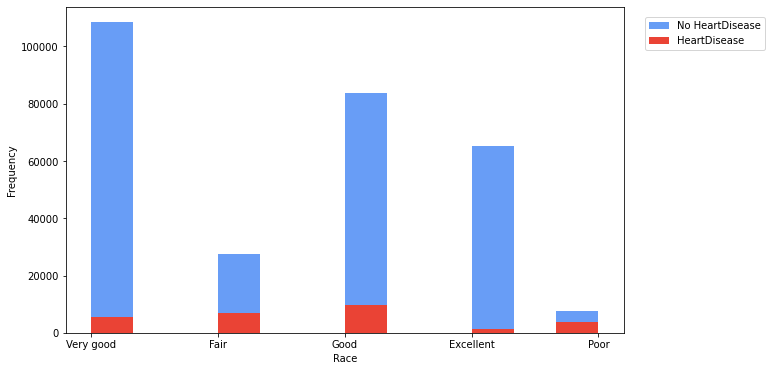

In [10]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["GenHealth"], bins=12, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["GenHealth"], bins=12, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=1.);

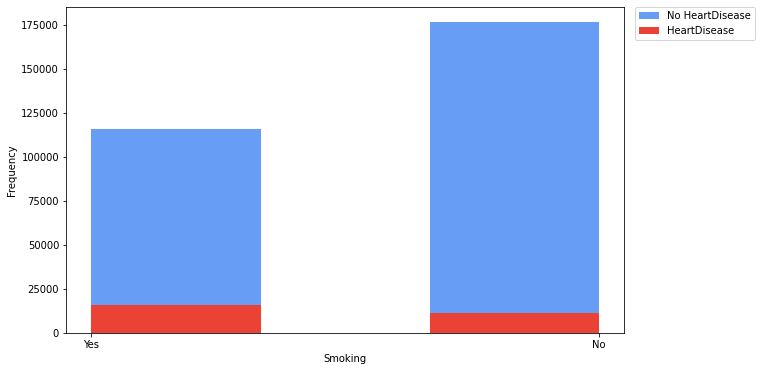

In [11]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

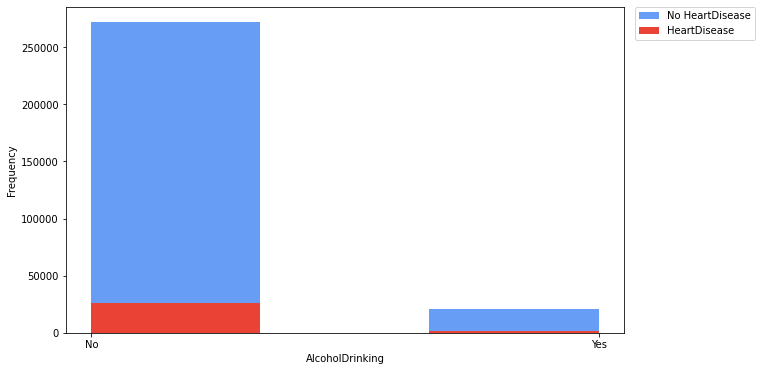

In [12]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["AlcoholDrinking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["AlcoholDrinking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

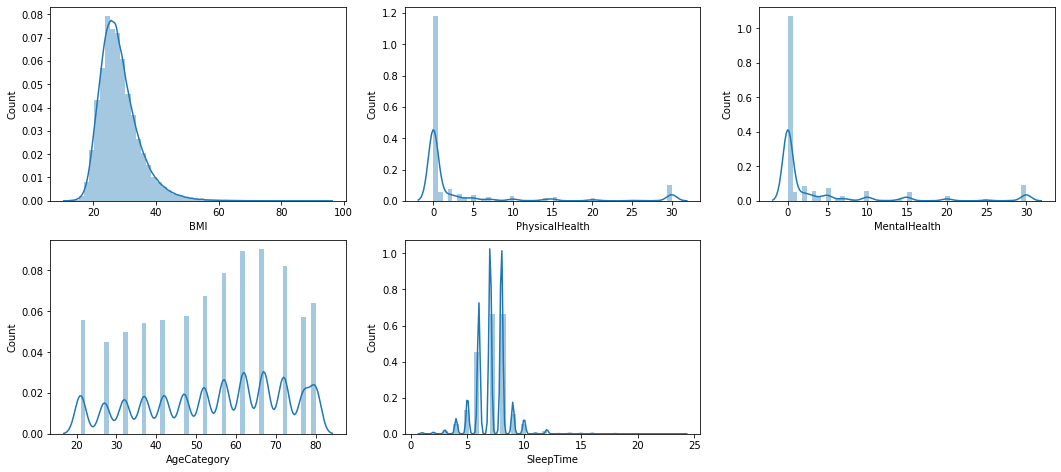

In [13]:
plt.figure(figsize=(18,25))
for index,item in enumerate(['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']):
  plt.subplot(6,3,index+1)
  sns.distplot(heart_disease[item],kde=True)
  plt.xlabel(item)
  plt.ylabel("Count")


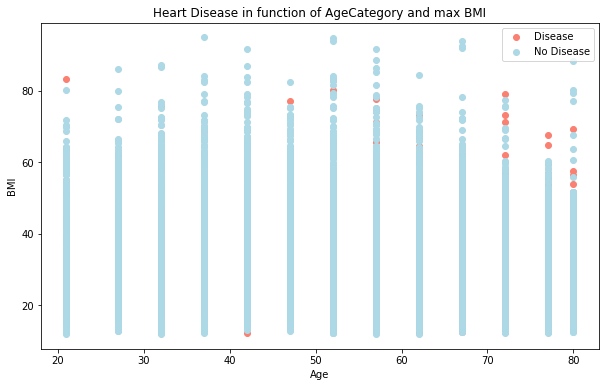

In [14]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(heart_disease.AgeCategory[heart_disease.HeartDisease=='Yes'],
            heart_disease.BMI[heart_disease.HeartDisease=='Yes'],
            color="salmon");

# Scatter with negative examples
plt.scatter(heart_disease.AgeCategory[heart_disease.HeartDisease=='No'],
            heart_disease.BMI[heart_disease.HeartDisease=='No'],
            color="lightblue")

# Add some helpfull info
plt.title("Heart Disease in function of AgeCategory and max BMI")
plt.xlabel("Age"),
plt.ylabel("BMI")
plt.legend(["Disease","No Disease"]);

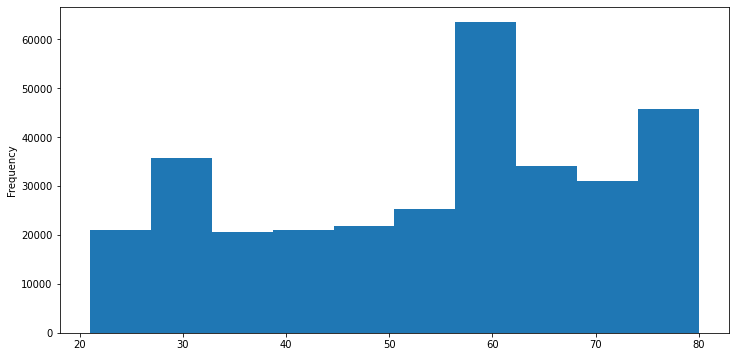

In [15]:
plt.figure(figsize=(12,6))
heart_disease.AgeCategory.plot.hist();

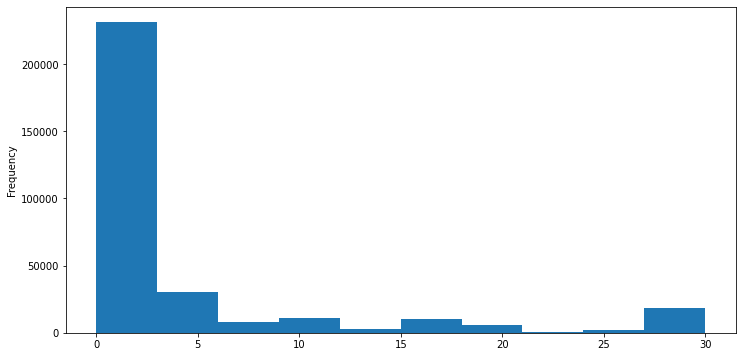

In [16]:
plt.figure(figsize=(12,6))
heart_disease.MentalHealth.plot.hist();

### Fix the dataframe in order to be ready for model use

In [17]:
# Lets start with the easy ones first
# Turn all yes and no columns to 0 and 1

heart_disease = heart_disease.replace({'No': 0, 'Yes': 1})
heart_disease['Sex'] = heart_disease['Sex'].replace({'Female': 0, 'Male': 1})
heart_disease['Race'] = heart_disease['Race'].replace({'White': 0 , 'Black': 1,
                                                       'Asian': 2, 'American': 3,
                                                       'American Indian/Alaskan Native': 4,
                                                       'Other':5, 'Hispanic':6})
heart_disease['GenHealth'] =  heart_disease['GenHealth'].replace({'Very good': 1, 'Fair': 2,
                                                                      'Good': 3, 'Poor':4,
                                                                      'Excellent':5})

heart_disease['Diabetic'] = heart_disease['Diabetic'].replace({'No, borderline diabetes':0,'Yes (during pregnancy)': 1})
heart_disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57,0,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,0,0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67,0,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77,0,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42,0,0,1,1,8.0,0,0,0


In [18]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

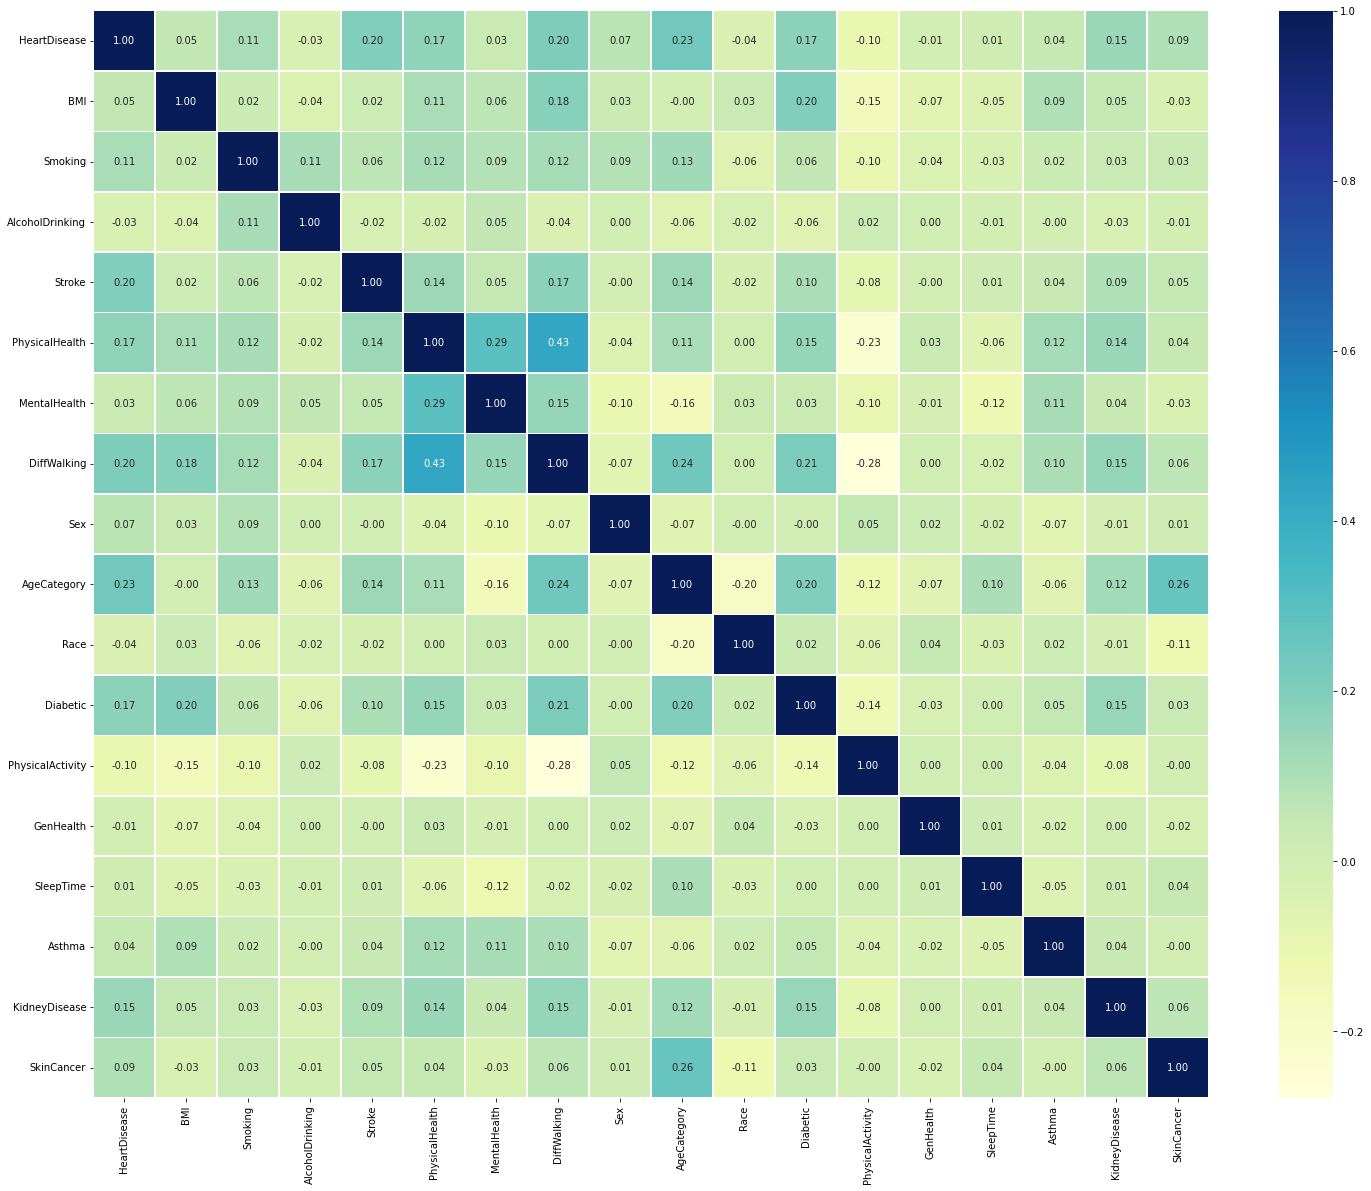

In [19]:
 # Plot out a correleation heatmap

corr_matrix = heart_disease.corr()

fig,ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap='YlGnBu');

## Task 3 Model Building
First make a train test split

In [20]:
X = heart_disease.drop('HeartDisease',axis=1)
y = heart_disease['HeartDisease']


X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
y_train

17891     0
51445     0
245829    0
294956    0
163869    0
         ..
206768    0
296734    0
84340     0
149602    0
260365    0
Name: HeartDisease, Length: 287815, dtype: int64

## Model 1 Random Forest Classifier
Create a gridSearchCV to find best RandomForestCLassifier

In [23]:
%%time
random_forest_grid = {"n_estimators": np.arange(10,100,10),
                      "max_depth":[None,3,5,10],
                      "min_samples_split":np.arange(2,20,2),
                      "min_samples_leaf":np.arange(2,20,2)}

random_forest_model = RandomizedSearchCV(RandomForestClassifier(),
                                         param_distributions=random_forest_grid,
                                         cv=2,
                                         n_iter=30,
                                         verbose = True)
random_forest_model.fit(X_train,y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
CPU times: user 4min 37s, sys: 1.2 s, total: 4min 38s
Wall time: 4min 45s


In [26]:
random_forest_pred = random_forest_model.predict(X_test)



forest_acc = accuracy_score(y_test, random_forest_pred)
forest_f1 = f1_score(y_test,random_forest_pred)
forest_r2 = r2_score(y_test,random_forest_pred)
forest_mae = mean_absolute_error(y_test,random_forest_pred)
forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_pred))

In [27]:
print("Accuracy : " ,forest_acc )
print("F1",forest_f1)
print("R^2 : ", forest_r2)
print("MAE :", forest_mae)
print("RMSE:",forest_rmse)

Accuracy :  0.9152595372107567
F1 0.07948369565217392
R^2 :  -0.07887838415996806
MAE : 0.08474046278924327
RMSE: 0.2911021518114273


## Model 2 CatBoostClassifier

In [28]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [29]:
%%time
from catboost import CatBoostClassifier

cat_boost_model = CatBoostClassifier(task_type='GPU',iterations=100)
cat_boost_model.fit(X_train,y_train)

Learning rate set to 0.194322
0:	learn: 0.5666292	total: 8.32ms	remaining: 824ms
1:	learn: 0.4805894	total: 16.9ms	remaining: 827ms
2:	learn: 0.4193158	total: 23.8ms	remaining: 768ms
3:	learn: 0.3742575	total: 30.7ms	remaining: 737ms
4:	learn: 0.3404350	total: 37.7ms	remaining: 717ms
5:	learn: 0.3151584	total: 46.5ms	remaining: 729ms
6:	learn: 0.2956029	total: 53.6ms	remaining: 712ms
7:	learn: 0.2803999	total: 60.5ms	remaining: 696ms
8:	learn: 0.2690319	total: 67.6ms	remaining: 684ms
9:	learn: 0.2607488	total: 74.7ms	remaining: 672ms
10:	learn: 0.2531059	total: 81.7ms	remaining: 661ms
11:	learn: 0.2476550	total: 88.6ms	remaining: 650ms
12:	learn: 0.2431941	total: 95.7ms	remaining: 641ms
13:	learn: 0.2398865	total: 104ms	remaining: 640ms
14:	learn: 0.2371127	total: 114ms	remaining: 647ms
15:	learn: 0.2345312	total: 121ms	remaining: 636ms
16:	learn: 0.2330339	total: 128ms	remaining: 626ms
17:	learn: 0.2319345	total: 135ms	remaining: 615ms
18:	learn: 0.2308017	total: 142ms	remaining: 606m

In [30]:
cat_pred = cat_boost_model.predict(X_test)

cat_acc = accuracy_score(y_test,cat_pred)
cat_f1 = f1_score(y_test,cat_pred)
cat_r2 = r2_score(y_test,cat_pred)
cat_mae = mean_absolute_error(y_test,cat_pred)
cat_rmse = np.sqrt(mean_squared_error(y_test, cat_pred))

In [31]:
print("Accuracy : " ,cat_acc )
print("F1",cat_f1)
print("R^2 : ", cat_r2)
print("MAE :", cat_mae)
print("RMSE:",cat_rmse)

Accuracy :  0.915134459036898
F1 0.14707730986800754
R^2 :  -0.08047082457939236
MAE : 0.08486554096310193
RMSE: 0.2913169081311655


In [32]:
model_results = [['Cat Boost',cat_acc,cat_f1,cat_r2,cat_mae,cat_rmse],
                 ['Random Forest',forest_acc,forest_f1,forest_r2,forest_mae,forest_rmse]]
model_results

[['Cat Boost',
  0.915134459036898,
  0.14707730986800754,
  -0.08047082457939236,
  0.08486554096310193,
  0.2913169081311655],
 ['Random Forest',
  0.9152595372107567,
  0.07948369565217392,
  -0.07887838415996806,
  0.08474046278924327,
  0.2911021518114273]]

In [33]:
model_results_df = pd.DataFrame(model_results,columns=["model","accuracy","f1",'R^2','MAE','RMSE'])
model_results_df

,model,accuracy,f1,R^2,MAE,RMSE
0,Cat Boost,0.915134,0.147077,-0.080471,0.084866,0.291317
1,Random Forest,0.915260,0.079484,-0.078878,0.084740,0.291102


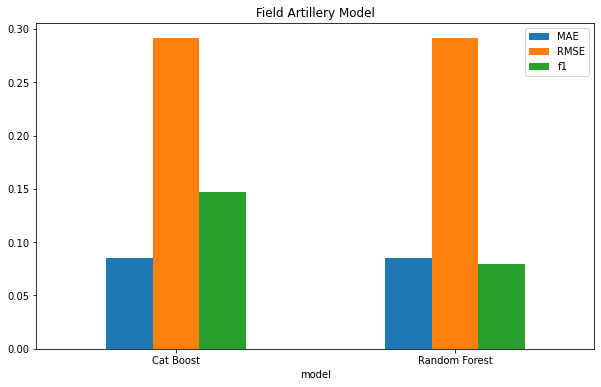

In [36]:
model_results_df.plot(x="model",y=['MAE','RMSE',"f1"],kind="bar",figsize=(10,6))
plt.title("Field Artillery Model")
plt.xticks(rotation="horizontal");

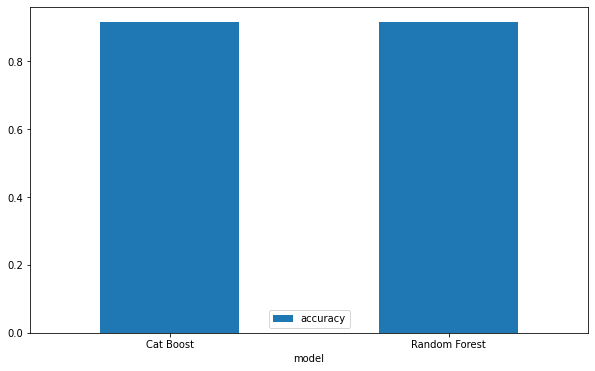

In [37]:
model_results_df.plot(x="model",y=["accuracy"],kind="bar",figsize=(10,6))
plt.xticks(rotation="horizontal");